In [1]:
%matplotlib notebook

import glob
import numpy              as np
import matplotlib.pyplot as plt
from photutils.utils import random_cmap

from astropy.io           import fits
from scipy                import stats
from scipy.optimize       import curve_fit
from scipy                import signal
from photutils import detect_sources
from astropy.visualization import scale_image


In [8]:
info = sorted(glob.glob('processed/sim09_100/info/info_rei00009_*'))

In [65]:
index = 26

data_x = np.loadtxt('processed/sim09_100/data/sim_09_f140w_x1_' + str(index) + '.dat')
data_y = np.loadtxt('processed/sim09_100/data/sim_09_f140w_y1_' + str(index) + '.dat')
data_z = np.loadtxt('processed/sim09_100/data/sim_09_f140w_z1_' + str(index) + '.dat')

data_x_2 = np.loadtxt('processed/sim09_100/data/sim_09_f140w_x2_' + str(index) + '.dat')
data_y_2 = np.loadtxt('processed/sim09_100/data/sim_09_f140w_y2_' + str(index) + '.dat')
data_z_2 = np.loadtxt('processed/sim09_100/data/sim_09_f140w_z2_' + str(index) + '.dat')

data_x_3 = np.loadtxt('processed/sim09_100/data/sim_09_f140w_x3_' + str(index) + '.dat')
data_y_3 = np.loadtxt('processed/sim09_100/data/sim_09_f140w_y3_' + str(index) + '.dat')
data_z_3 = np.loadtxt('processed/sim09_100/data/sim_09_f140w_z3_' + str(index) + '.dat')

redshift, D_A, Angular_size, c_x, c_y, c_z, r = np.loadtxt(info[index], skiprows=1)
maximum = np.max(data_x)
sigma = np.std(data_x)

print('shape data:', np.shape(data))
print('max:', maximum)
print('std:', sigma)
print('redshift:', redshift)
print('Angular Diameter Distance [Mpc]:', D_A)
print('Angular Size [arc-sec]:', Angular_size)

shape data: (249, 249)
max: 18.2162
std: 0.17791853311
redshift: 5.49085138272
Angular Diameter Distance [Mpc]: 1269.66748929
Angular Size [arc-sec]: 32.4911839894


# HST, Z = 5.491

redshift: 5.49085138272


<IPython.core.display.Javascript object>


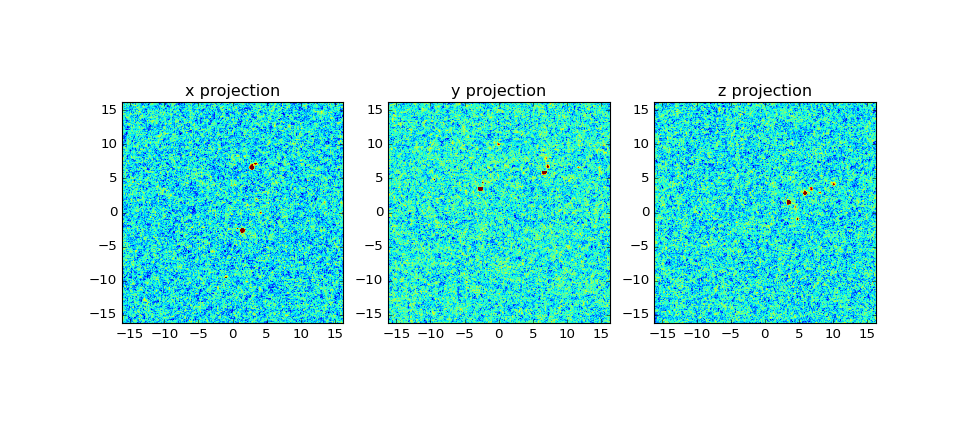

<IPython.core.display.Javascript object>


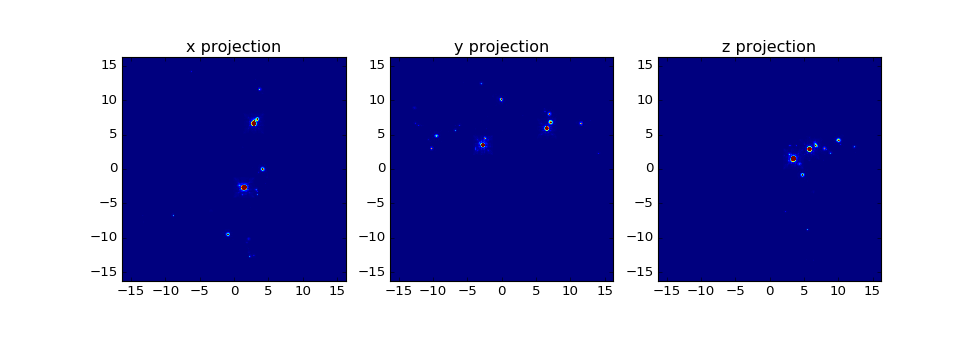

In [25]:
print('redshift:', redshift)
edges = Angular_size/2
extent = [-edges,edges, -edges, edges]
plt.figure(1)
plt.subplot(1,3,1)
plt.title('x projection')
plt.imshow(data_x,interpolation='nearest',extent=extent,vmax=sigma*5)
plt.subplot(1,3,2)
plt.title('y projection')
plt.imshow(data_y,interpolation='nearest',extent=extent,vmax=sigma*5)
plt.subplot(1,3,3)
plt.title('z projection')
plt.imshow(data_z,interpolation='nearest',extent=extent,vmax=sigma*5)

plt.figure(2)
plt.subplot(1,3,1)
plt.title('x projection')
plt.imshow(data_x_2,interpolation='nearest',extent=extent,vmax=3)
plt.subplot(1,3,2)
plt.title('y projection')
plt.imshow(data_y_2,interpolation='nearest',extent=extent,vmax=3)
plt.subplot(1,3,3)
plt.title('z projection')
plt.imshow(data_z_2,interpolation='nearest',extent=extent,vmax=3)

# JWST, Z = 5.491

In [66]:
index = 26

data_J_x = np.loadtxt('processed/sim09_100/data/sim_09_F150W_x1_' + str(index) + '.dat')
data_J_y = np.loadtxt('processed/sim09_100/data/sim_09_F150W_y1_' + str(index) + '.dat')
data_J_z = np.loadtxt('processed/sim09_100/data/sim_09_F150W_z1_' + str(index) + '.dat')

data_J_x_2 = np.loadtxt('processed/sim09_100/data/sim_09_F150W_x2_' + str(index) + '.dat')
data_J_y_2 = np.loadtxt('processed/sim09_100/data/sim_09_F150W_y2_' + str(index) + '.dat')
data_J_z_2 = np.loadtxt('processed/sim09_100/data/sim_09_F150W_z2_' + str(index) + '.dat')

data_J_x_3 = np.loadtxt('processed/sim09_100/data/sim_09_F150W_x3_' + str(index) + '.dat')
data_J_y_3 = np.loadtxt('processed/sim09_100/data/sim_09_F150W_y3_' + str(index) + '.dat')
data_J_z_3 = np.loadtxt('processed/sim09_100/data/sim_09_F150W_z3_' + str(index) + '.dat')

redshift, D_A, Angular_size, c_x, c_y, c_z, r = np.loadtxt(info[index], skiprows=1)
maximum = np.max(data_J_x)
sigma = np.std(data_J_x)

print('shape data:', np.shape(data_J_x))
print('max:', maximum)
print('std:', sigma)
print('redshift:', redshift)
print('Angular Diameter Distance [Mpc]:', D_A)
print('Angular Size [arc-sec]:', Angular_size)

shape data: (1015, 1015)
max: 4.14081
std: 0.0189899991789
redshift: 5.49085138272
Angular Diameter Distance [Mpc]: 1269.66748929
Angular Size [arc-sec]: 32.4911839894


redshift: 5.49085138272


<IPython.core.display.Javascript object>


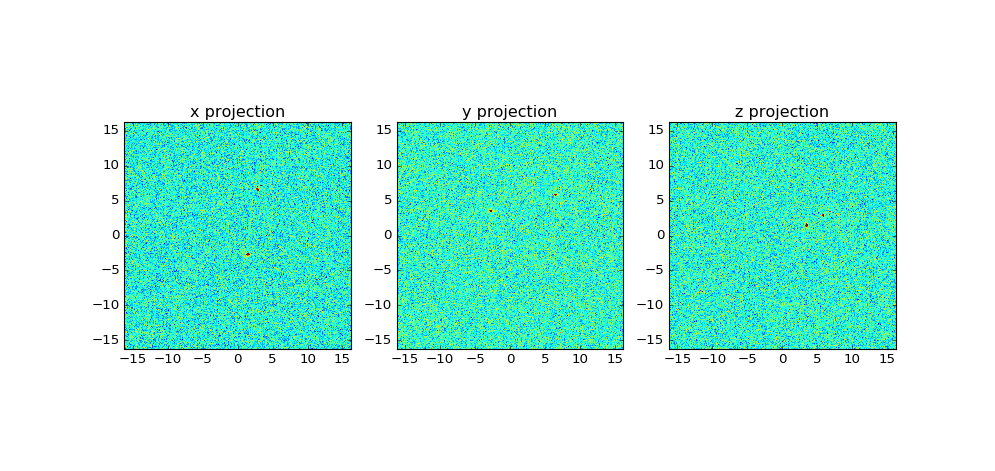

<IPython.core.display.Javascript object>


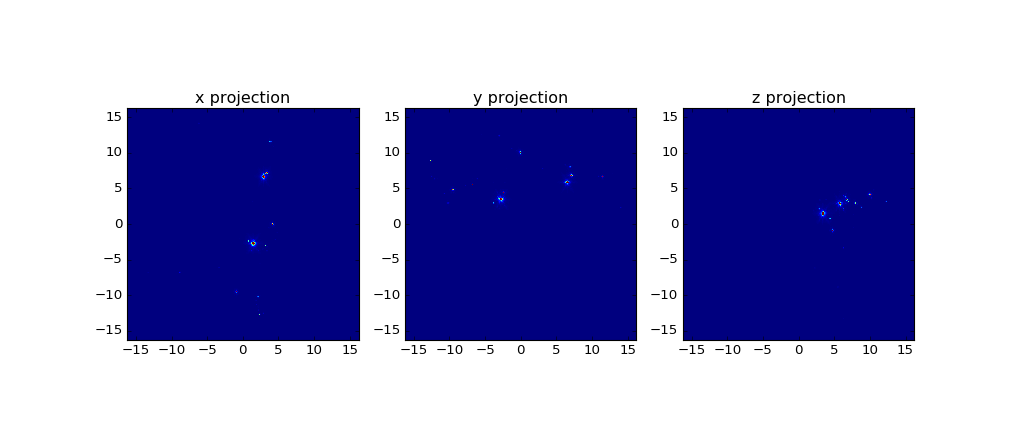

In [33]:
print('redshift:', redshift)
edges = Angular_size/2
extent = [-edges,edges, -edges, edges]
plt.figure(3)
plt.subplot(1,3,1)
plt.title('x projection')
plt.imshow(data_J_x,interpolation='nearest',extent=extent,vmax=sigma*5)
plt.subplot(1,3,2)
plt.title('y projection')
plt.imshow(data_J_y,interpolation='nearest',extent=extent,vmax=sigma*5)
plt.subplot(1,3,3)
plt.title('z projection')
plt.imshow(data_J_z,interpolation='nearest',extent=extent,vmax=sigma*5)

plt.figure(4)
plt.subplot(1,3,1)
plt.title('x projection')
plt.imshow(data_J_x_2,interpolation='nearest',extent=extent,vmax=3)
plt.subplot(1,3,2)
plt.title('y projection')
plt.imshow(data_J_y_2,interpolation='nearest',extent=extent,vmax=3)
plt.subplot(1,3,3)
plt.title('z projection')
plt.imshow(data_J_z_2,interpolation='nearest',extent=extent,vmax=3)

<IPython.core.display.Javascript object>


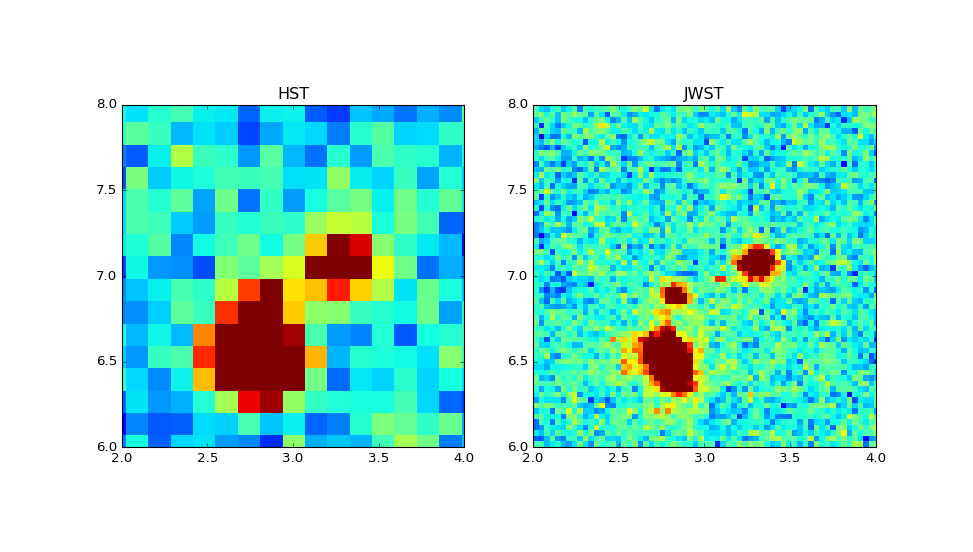

(6, 8)

In [40]:
sigma_H = np.std(data_x)
sigma_J = np.std(data_J_x)

plt.figure(5)
plt.subplot(1,2,1)
plt.title('HST')
plt.imshow(data_x,interpolation='nearest',extent=extent,vmax=sigma_H*5)
plt.xlim(2,4)
plt.ylim(6,8)

plt.subplot(1,2,2)
plt.title('JWST')
plt.imshow(data_J_x,interpolation='nearest',extent=extent,vmax=sigma_J*5)
plt.xlim(2,4)
plt.ylim(6,8)

# Let's see the difference between HST and JWST observations for 09 10 Mpc box simulation (100 kpc sphere, z = 5.491, x projection, HST f140w filter, JWST F150W filter)

Found 2 sources
Found 8 sources


<IPython.core.display.Javascript object>


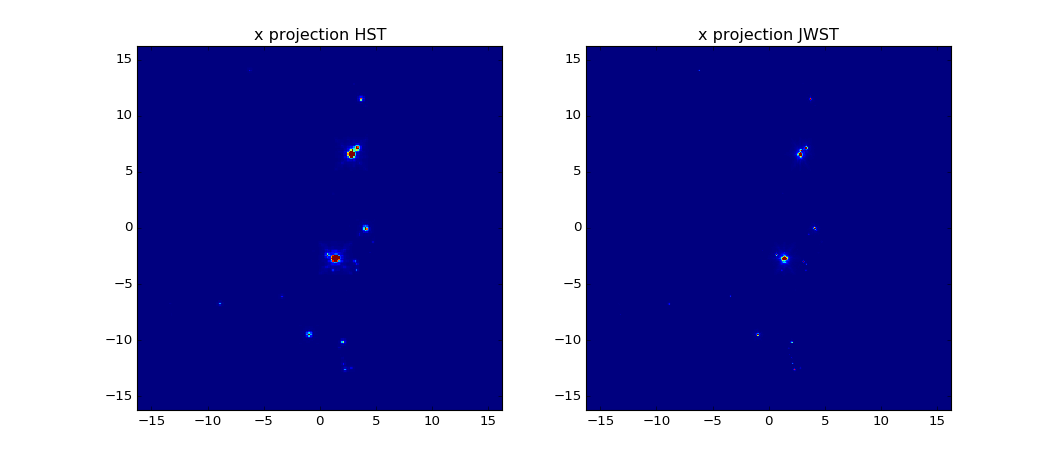

<IPython.core.display.Javascript object>


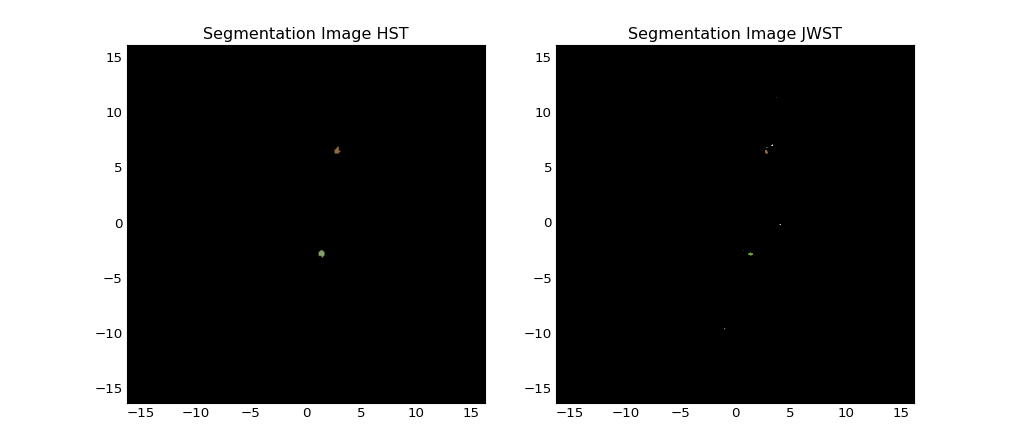

<IPython.core.display.Javascript object>


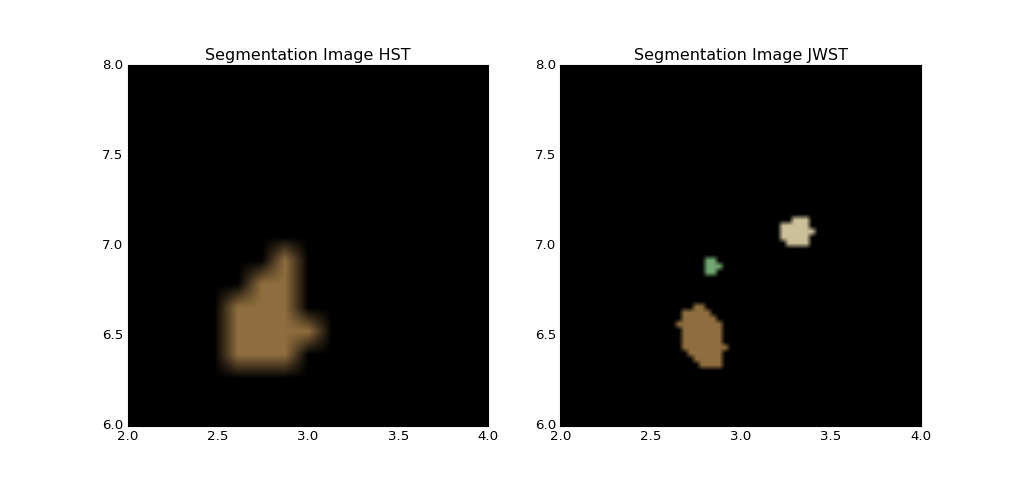

<IPython.core.display.Javascript object>


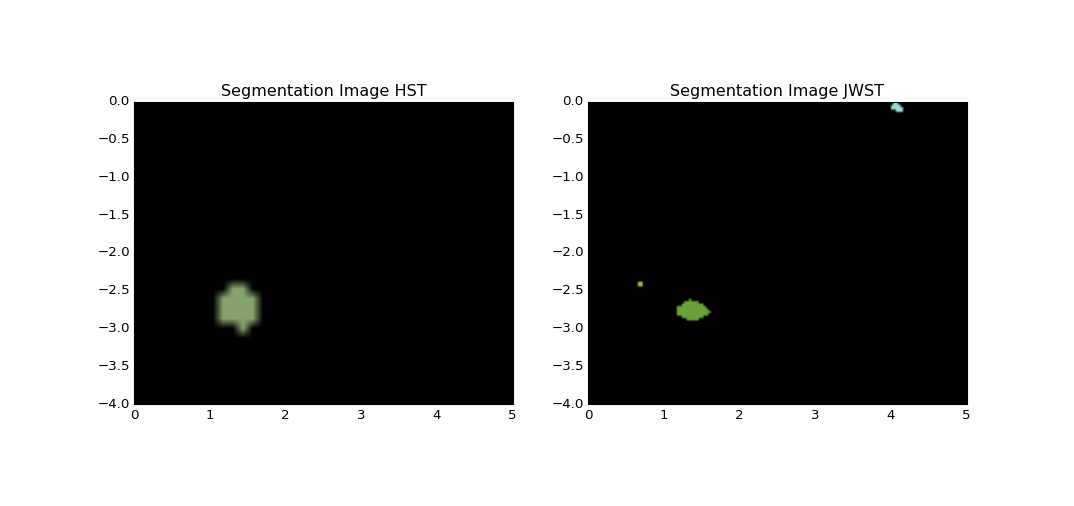

In [174]:
threshold = 4
npixels = 4
segm1 = detect_sources(data_x_3, threshold, npixels)
print('Found {0} sources'.format(segm1.nlabels))
segm2 = detect_sources(data_J_x_3, threshold, npixels)
print('Found {0} sources'.format(segm2.nlabels))

rand_cmap = random_cmap(random_state=12345)

plt.figure(13)
plt.subplot(1,2,1)
plt.title('x projection HST')
plt.imshow(data_x_2,interpolation='nearest',extent=extent,vmax=3)
plt.subplot(1,2,2)
plt.title('x projection JWST')
plt.imshow(data_J_x_2,interpolation='nearest',extent=extent,vmax=3)

plt.figure(10)
plt.subplot(1,2,1)
#plt.imshow(scale_image(data_x_3, scale='sqrt', percent=99.5))
plt.imshow(segm1, cmap=rand_cmap,extent=extent)
plt.title('Segmentation Image HST')
plt.subplot(1,2,2)
plt.imshow(segm2, cmap=rand_cmap,extent=extent)
plt.title('Segmentation Image JWST')


plt.figure(6)
plt.subplot(1,2,1)
#plt.imshow(scale_image(data_x_3, scale='sqrt', percent=99.5))
plt.imshow(segm1, cmap=rand_cmap,extent=extent)
plt.xlim(2,4)
plt.ylim(6,8)
plt.title('Segmentation Image HST')
plt.subplot(1,2,2)
plt.imshow(segm2, cmap=rand_cmap,extent=extent)
plt.xlim(2,4)
plt.ylim(6,8)
plt.title('Segmentation Image JWST')

plt.figure(8)
plt.subplot(1,2,1)
#plt.imshow(scale_image(data_x_3, scale='sqrt', percent=99.5))
plt.imshow(segm1, cmap=rand_cmap,extent=extent)
plt.xlim(0,5)
plt.ylim(-4,0)
plt.title('Segmentation Image HST')
plt.subplot(1,2,2)
plt.imshow(segm2, cmap=rand_cmap,extent=extent)
plt.xlim(0,5)
plt.ylim(-4,0)
plt.title('Segmentation Image JWST')


In [24]:
threshold = 4
npixels = 4

# data with noise
HST_number_of_sources_x = []
JWST_number_of_sources_x = []

HST_number_of_sources_y = []
JWST_number_of_sources_y = []

HST_number_of_sources_z = []
JWST_number_of_sources_z = []

for index in range(0,27):
   
    print(index)
    
    if(index<10):
        HST_data_x = np.loadtxt('processed/sim09_100/data/sim_09_f140w_x3_0' + str(index) + '.dat')
        HST_data_y = np.loadtxt('processed/sim09_100/data/sim_09_f140w_y3_0' + str(index) + '.dat')
        HST_data_z = np.loadtxt('processed/sim09_100/data/sim_09_f140w_z3_0' + str(index) + '.dat')

        JWST_data_x = np.loadtxt('processed/sim09_100/data/sim_09_F150W_x3_0' + str(index) + '.dat')
        JWST_data_y = np.loadtxt('processed/sim09_100/data/sim_09_F150W_y3_0' + str(index) + '.dat')
        JWST_data_z = np.loadtxt('processed/sim09_100/data/sim_09_F150W_z3_0' + str(index) + '.dat')

    else:
        HST_data_x = np.loadtxt('processed/sim09_100/data/sim_09_f140w_x3_' + str(index) + '.dat')
        HST_data_y = np.loadtxt('processed/sim09_100/data/sim_09_f140w_y3_' + str(index) + '.dat')
        HST_data_z = np.loadtxt('processed/sim09_100/data/sim_09_f140w_z3_' + str(index) + '.dat')

        JWST_data_x = np.loadtxt('processed/sim09_100/data/sim_09_F150W_x3_' + str(index) + '.dat')
        JWST_data_y = np.loadtxt('processed/sim09_100/data/sim_09_F150W_y3_' + str(index) + '.dat')
        JWST_data_z = np.loadtxt('processed/sim09_100/data/sim_09_F150W_z3_' + str(index) + '.dat')
        
        
    segm = detect_sources(HST_data_x, threshold, npixels)
    HST_number_of_sources_x.append(segm.nlabels)
    segm = detect_sources(HST_data_y, threshold, npixels)
    HST_number_of_sources_y.append(segm.nlabels)
    segm = detect_sources(HST_data_z, threshold, npixels)
    HST_number_of_sources_z.append(segm.nlabels)
    segm = detect_sources(JWST_data_x, threshold, npixels)
    JWST_number_of_sources_x.append(segm.nlabels)
    segm = detect_sources(JWST_data_y, threshold, npixels)
    JWST_number_of_sources_y.append(segm.nlabels)
    segm = detect_sources(JWST_data_z, threshold, npixels)
    JWST_number_of_sources_z.append(segm.nlabels)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26


<IPython.core.display.Javascript object>


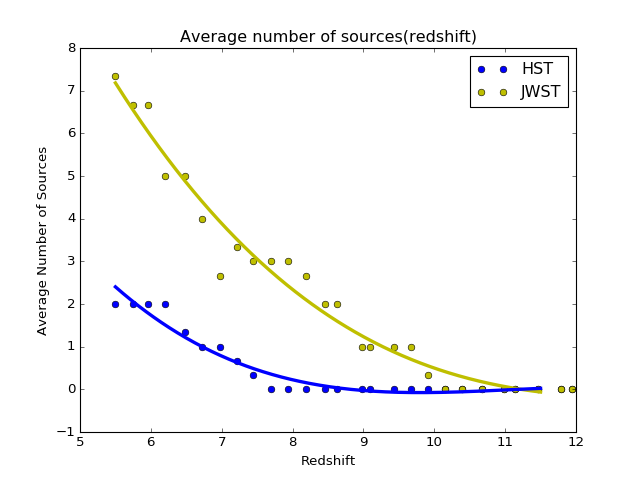

In [31]:
redshifts09 = []
info09 = sorted(glob.glob('processed/sim09_100/info/info_rei00009_*'))

for i in range(27):
    redshift, D_A, Angular_size, c_x, c_y, c_z, r = np.loadtxt(info09[i], skiprows=1)
    redshifts09.append(redshift)

def trial_f(x,a,b,c,d):
    return a + b*x +c*x*x + d*x*x*x

HST_09 = (np.array(HST_number_of_sources_x) + np.array(HST_number_of_sources_y) + np.array(HST_number_of_sources_z))/3
JWST_09 = (np.array(JWST_number_of_sources_x) + np.array(JWST_number_of_sources_y) + np.array(JWST_number_of_sources_z))/3

JWST_params1, cov_mtr = curve_fit(trial_f,redshifts02,JWST_09)
HST_params1, cov_mtr = curve_fit(trial_f,redshifts02,HST_09)
redshifts_sample = np.linspace(5.5,11.5,500)

plt.figure(30)

plt.title('Average number of sources(redshift)')
plt.plot(redshifts09, HST_09,'bo', label='HST')
plt.plot(redshifts09, JWST_09,'yo', label='JWST')
plt.plot(redshifts_sample,trial_f(redshifts_sample,*JWST_params1),'y-',lw=3)
plt.plot(redshifts_sample,trial_f(redshifts_sample,*HST_params1),'b-',lw=3)
plt.ylabel('Average Number of Sources')
plt.xlabel('Redshift')
plt.legend(loc='upper right')

In [27]:
# data with noise
HST_number_of_sources_3x = []
JWST_number_of_sources_3x = []

HST_number_of_sources_3y = []
JWST_number_of_sources_3y = []

HST_number_of_sources_3z = []
JWST_number_of_sources_3z = []

for index in range(0,27):
   
    print(index)
    
    if(index<10):
        HST_data_x = np.loadtxt('processed/sim02_100/data/sim_02_f140w_x3_0' + str(index) + '.dat')
        HST_data_y = np.loadtxt('processed/sim02_100/data/sim_02_f140w_y3_0' + str(index) + '.dat')
        HST_data_z = np.loadtxt('processed/sim02_100/data/sim_02_f140w_z3_0' + str(index) + '.dat')

        JWST_data_x = np.loadtxt('processed/sim02_100/data/sim_02_F150W_x3_0' + str(index) + '.dat')
        JWST_data_y = np.loadtxt('processed/sim02_100/data/sim_02_F150W_y3_0' + str(index) + '.dat')
        JWST_data_z = np.loadtxt('processed/sim02_100/data/sim_02_F150W_z3_0' + str(index) + '.dat')

    else:
        HST_data_x = np.loadtxt('processed/sim02_100/data/sim_02_f140w_x3_' + str(index) + '.dat')
        HST_data_y = np.loadtxt('processed/sim02_100/data/sim_02_f140w_y3_' + str(index) + '.dat')
        HST_data_z = np.loadtxt('processed/sim02_100/data/sim_02_f140w_z3_' + str(index) + '.dat')

        JWST_data_x = np.loadtxt('processed/sim02_100/data/sim_02_F150W_x3_' + str(index) + '.dat')
        JWST_data_y = np.loadtxt('processed/sim02_100/data/sim_02_F150W_y3_' + str(index) + '.dat')
        JWST_data_z = np.loadtxt('processed/sim02_100/data/sim_02_F150W_z3_' + str(index) + '.dat')
        
        
    segm = detect_sources(HST_data_x, threshold, npixels)
    HST_number_of_sources_3x.append(segm.nlabels)
    segm = detect_sources(HST_data_y, threshold, npixels)
    HST_number_of_sources_3y.append(segm.nlabels)
    segm = detect_sources(HST_data_z, threshold, npixels)
    HST_number_of_sources_3z.append(segm.nlabels)
    segm = detect_sources(JWST_data_x, threshold, npixels)
    JWST_number_of_sources_3x.append(segm.nlabels)
    segm = detect_sources(JWST_data_y, threshold, npixels)
    JWST_number_of_sources_3y.append(segm.nlabels)
    segm = detect_sources(JWST_data_z, threshold, npixels)
    JWST_number_of_sources_3z.append(segm.nlabels)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26


<IPython.core.display.Javascript object>


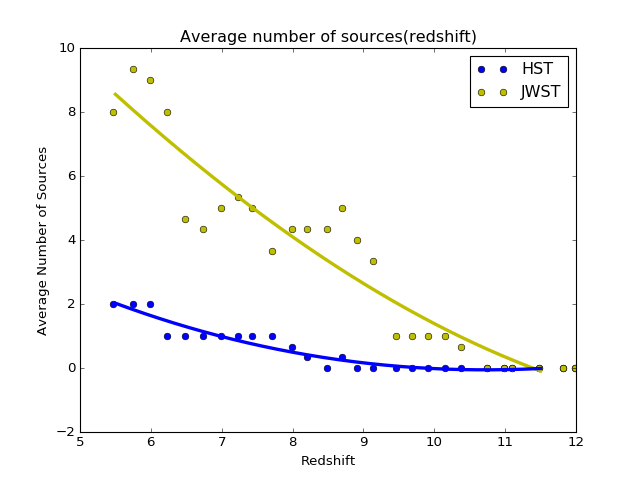

In [28]:
redshifts02 = []
info02 = sorted(glob.glob('processed/sim02_100/info/info_rei00002_*'))

for i in range(27):
    redshift, D_A, Angular_size, c_x, c_y, c_z, r = np.loadtxt(info02[i], skiprows=1)
    redshifts02.append(redshift)

def trial_f(x,a,b,c,d):
    return a + b*x +c*x*x + d*x*x*x

HST_02 = (np.array(HST_number_of_sources_3x) + np.array(HST_number_of_sources_3y) + np.array(HST_number_of_sources_3z))/3
JWST_02 = (np.array(JWST_number_of_sources_3x) + np.array(JWST_number_of_sources_3y) + np.array(JWST_number_of_sources_3z))/3

JWST_params3, cov_mtr = curve_fit(trial_f,redshifts02,JWST_02)
HST_params3, cov_mtr = curve_fit(trial_f,redshifts02,HST_02)
redshifts_sample = np.linspace(5.5,11.5,500)

plt.figure(22)

plt.title('Average number of sources(redshift)')
plt.plot(redshifts02, HST_02,'bo', label='HST')
plt.plot(redshifts02, JWST_02,'yo', label='JWST')
plt.plot(redshifts_sample,trial_f(redshifts_sample,*JWST_params3),'y-',lw=3)
plt.plot(redshifts_sample,trial_f(redshifts_sample,*HST_params3),'b-',lw=3)
plt.ylabel('Average Number of Sources')
plt.xlabel('Redshift')
plt.legend(loc='upper right')

In [29]:
# data with noise
HST_number_of_sources_2x = []
JWST_number_of_sources_2x = []

HST_number_of_sources_2y = []
JWST_number_of_sources_2y = []

HST_number_of_sources_2z = []
JWST_number_of_sources_2z = []

for index in range(0,27):
   
    print(index)
    
    if(index<10):
        HST_data_x = np.loadtxt('processed/sim01_100/data/sim_01_f140w_x3_0' + str(index) + '.dat')
        HST_data_y = np.loadtxt('processed/sim01_100/data/sim_01_f140w_y3_0' + str(index) + '.dat')
        HST_data_z = np.loadtxt('processed/sim01_100/data/sim_01_f140w_z3_0' + str(index) + '.dat')

        JWST_data_x = np.loadtxt('processed/sim01_100/data/sim_01_F150W_x3_0' + str(index) + '.dat')
        JWST_data_y = np.loadtxt('processed/sim01_100/data/sim_01_F150W_y3_0' + str(index) + '.dat')
        JWST_data_z = np.loadtxt('processed/sim01_100/data/sim_01_F150W_z3_0' + str(index) + '.dat')

    else:
        HST_data_x = np.loadtxt('processed/sim01_100/data/sim_01_f140w_x3_' + str(index) + '.dat')
        HST_data_y = np.loadtxt('processed/sim01_100/data/sim_01_f140w_y3_' + str(index) + '.dat')
        HST_data_z = np.loadtxt('processed/sim01_100/data/sim_01_f140w_z3_' + str(index) + '.dat')

        JWST_data_x = np.loadtxt('processed/sim01_100/data/sim_01_F150W_x3_' + str(index) + '.dat')
        JWST_data_y = np.loadtxt('processed/sim01_100/data/sim_01_F150W_y3_' + str(index) + '.dat')
        JWST_data_z = np.loadtxt('processed/sim01_100/data/sim_01_F150W_z3_' + str(index) + '.dat')
        
        
    segm = detect_sources(HST_data_x, threshold, npixels)
    HST_number_of_sources_2x.append(segm.nlabels)
    segm = detect_sources(HST_data_y, threshold, npixels)
    HST_number_of_sources_2y.append(segm.nlabels)
    segm = detect_sources(HST_data_z, threshold, npixels)
    HST_number_of_sources_2z.append(segm.nlabels)
    segm = detect_sources(JWST_data_x, threshold, npixels)
    JWST_number_of_sources_2x.append(segm.nlabels)
    segm = detect_sources(JWST_data_y, threshold, npixels)
    JWST_number_of_sources_2y.append(segm.nlabels)
    segm = detect_sources(JWST_data_z, threshold, npixels)
    JWST_number_of_sources_2z.append(segm.nlabels)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26


<IPython.core.display.Javascript object>


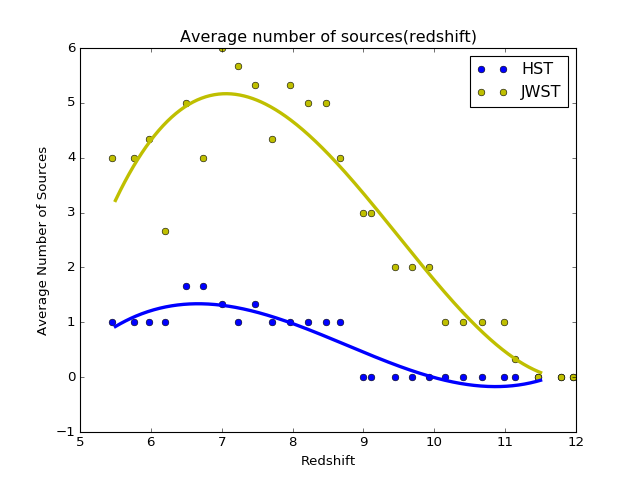

In [30]:
redshifts01 = []
info01 = sorted(glob.glob('processed/sim01_100/info/info_rei00001_*'))

for i in range(27):
    redshift, D_A, Angular_size, c_x, c_y, c_z, r = np.loadtxt(info01[i], skiprows=1)
    redshifts01.append(redshift)

def trial_f(x,a,b,c,d):
    return a + b*x +c*x*x + d*x*x*x

HST_01 = (np.array(HST_number_of_sources_2x) + np.array(HST_number_of_sources_2y) + np.array(HST_number_of_sources_2z))/3
JWST_01 = (np.array(JWST_number_of_sources_2x) + np.array(JWST_number_of_sources_2y) + np.array(JWST_number_of_sources_2z))/3

JWST_params2, cov_mtr = curve_fit(trial_f,redshifts01,JWST_01)
HST_params2, cov_mtr = curve_fit(trial_f,redshifts01,HST_01)
redshifts_sample = np.linspace(5.5,11.5,500)

plt.figure(23)
plt.title('Average number of sources(redshift)')
plt.plot(redshifts01, HST_01,'bo', label='HST')
plt.plot(redshifts01, JWST_01,'yo', label='JWST')
plt.plot(redshifts_sample,trial_f(redshifts_sample,*JWST_params2),'y-',lw=3)
plt.plot(redshifts_sample,trial_f(redshifts_sample,*HST_params2),'b-',lw=3)
plt.ylabel('Average Number of Sources')
plt.xlabel('Redshift')
plt.legend(loc='upper right')

<IPython.core.display.Javascript object>


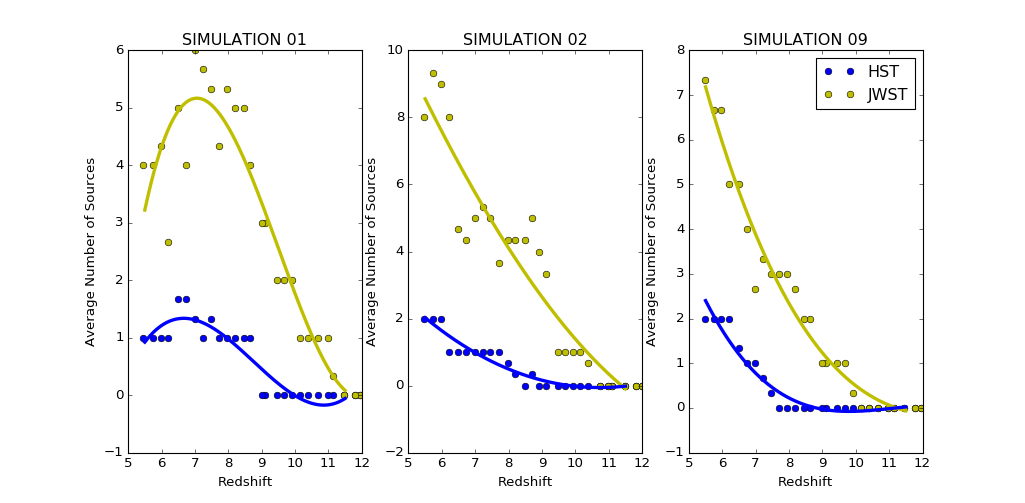

In [32]:
plt.figure(35)
plt.subplot(1,3,1)
plt.title('SIMULATION 01')
plt.plot(redshifts01, HST_01,'bo', label='HST')
plt.plot(redshifts01, JWST_01,'yo', label='JWST')
plt.plot(redshifts_sample,trial_f(redshifts_sample,*JWST_params2),'y-',lw=3)
plt.plot(redshifts_sample,trial_f(redshifts_sample,*HST_params2),'b-',lw=3)
plt.ylabel('Average Number of Sources')
plt.xlabel('Redshift')
#plt.legend(loc='upper right')

plt.subplot(1,3,2)
plt.title('SIMULATION 02')
plt.plot(redshifts02, HST_02,'bo', label='HST')
plt.plot(redshifts02, JWST_02,'yo', label='JWST')
plt.plot(redshifts_sample,trial_f(redshifts_sample,*JWST_params3),'y-',lw=3)
plt.plot(redshifts_sample,trial_f(redshifts_sample,*HST_params3),'b-',lw=3)
plt.ylabel('Average Number of Sources')
plt.xlabel('Redshift')
#plt.legend(loc='upper right')

plt.subplot(1,3,3)
plt.title('SIMULATION 09')
plt.plot(redshifts09, HST_09,'bo', label='HST')
plt.plot(redshifts09, JWST_09,'yo', label='JWST')
plt.plot(redshifts_sample,trial_f(redshifts_sample,*JWST_params1),'y-',lw=3)
plt.plot(redshifts_sample,trial_f(redshifts_sample,*HST_params1),'b-',lw=3)
plt.ylabel('Average Number of Sources')
plt.xlabel('Redshift')
plt.legend(loc='upper right')

<IPython.core.display.Javascript object>


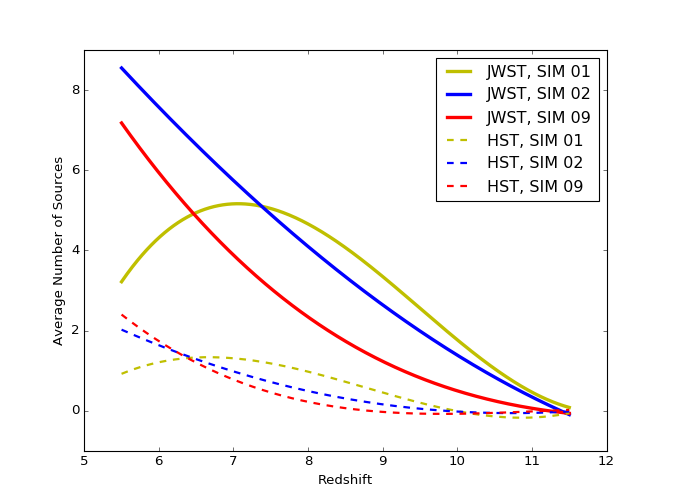

In [35]:
plt.figure(36)
plt.ylabel('Average Number of Sources')

plt.plot(redshifts_sample,trial_f(redshifts_sample,*JWST_params2),'y-',label='JWST, SIM 01',lw=3)
plt.plot(redshifts_sample,trial_f(redshifts_sample,*JWST_params3),'b-',label='JWST, SIM 02',lw=3)
plt.plot(redshifts_sample,trial_f(redshifts_sample,*JWST_params1),'r-',label='JWST, SIM 09',lw=3)
plt.plot(redshifts_sample,trial_f(redshifts_sample,*HST_params2),'y--',label='HST, SIM 01',lw=2)
plt.plot(redshifts_sample,trial_f(redshifts_sample,*HST_params3),'b--',label='HST, SIM 02',lw=2)
plt.plot(redshifts_sample,trial_f(redshifts_sample,*HST_params1),'r--',label='HST, SIM 09',lw=2)
plt.xlabel('Redshift')
plt.legend(loc='upper right')